In [13]:
import awkward as ak
import hist
import numpy as np
import gzip
import pylhe
import matplotlib.pyplot as plt
import fastjet as fj
import awkward as ak
import time

import random
import copy

In [14]:
events=pylhe.read_lhe("unweighted_events.lhe")
events_showered=pylhe.read_lhe("emep_ttx_bbx4j_events_showered.lhe")
particles = []
all_event=[]
i=0
for event in events:
    particl=[]
    i+=1
    #print(event)
    for particle in event.particles:
        if particle.status == 1:  # Only stable particles
            px, py, pz, E = particle.px, particle.py, particle.pz, particle.e
            eta = 0.5 * np.log((np.sqrt(px**2 + py**2 + pz**2) + pz) / (np.sqrt(px**2 + py**2 + pz**2) - pz))
            phi = np.arctan2(py, px)
            pt = np.sqrt(px**2 + py**2)
            particles.append([eta, phi, pt, E, px, py, pz])
            particl.append([eta, phi, pt, E, px, py, pz])
    if i>1000:
        break
        
    all_event.append(particl)

particle_data = np.array(particles)

In [15]:
particles_s = []
all_event_s=[]
j=0
for event_s in events_showered:
    particl_s=[]
    j+=1
    #print(event_s)
    for particle in event_s.particles:
        if particle.status == 1:  # Only stable particles
            px, py, pz, E = particle.px, particle.py, particle.pz, particle.e
            eta = 0.5 * np.log((np.sqrt(px**2 + py**2 + pz**2) + pz) / (np.sqrt(px**2 + py**2 + pz**2) - pz))
            phi = np.arctan2(py, px)
            pt = np.sqrt(px**2 + py**2)
            particles_s.append([eta, phi, pt, E, px, py, pz])
            particl_s.append([eta, phi, pt, E, px, py, pz])
    if j>1000:
        break
        
    all_event_s.append(particl_s)

particle_data_s = np.array(particles_s)

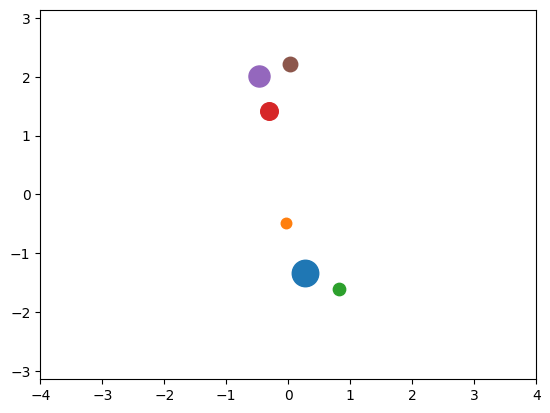

In [16]:
for i in all_event[50]:
    plt.scatter(i[0],i[1],s=i[3])
plt.xlim(-4,4)
plt.ylim(-np.pi,np.pi)
plt.show()

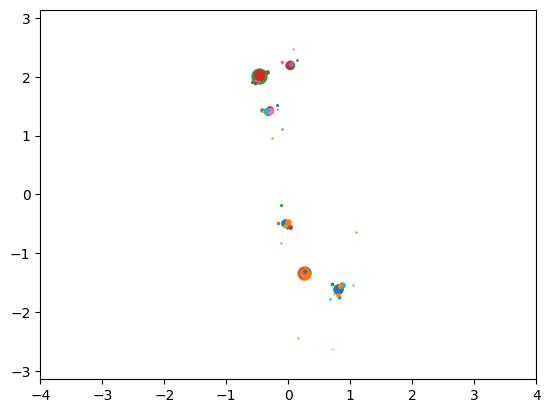

In [17]:
for j in all_event_s[50]:
    plt.scatter(j[0],j[1],s=j[3])
plt.xlim(-4,4)
plt.ylim(-np.pi,np.pi)
plt.show()

Jet: pt = 57.75156093740053, eta = 0.8177569827079781, phi = -1.6033462187368812, e = 78.42569574000001
Jet: pt = 0.3859406591819344, eta = 0.1596834187396506, phi = -2.4324550269626526, e = 0.41504267
Jet: pt = 344.5131258060807, eta = 0.26676020283603663, phi = -1.3291369969525597, e = 356.91058369999996
Jet: pt = 208.85011463107028, eta = -0.46367470457327814, phi = 2.020789485744359, e = 231.84658520000002
Jet: pt = 0.06318728642093216, eta = 0.7081613028684373, phi = -2.619384305605162, e = 0.079704563
Jet: pt = 107.05010532584079, eta = 0.02935155197271057, phi = 2.2114586184263345, e = 107.16100384
Jet: pt = 150.60236958125589, eta = -0.31920559856544195, phi = 1.422077410020044, e = 158.57571683999998
Jet: pt = 0.3687884555936742, eta = 1.097164359520282, phi = -0.6347201733665377, e = 0.62960092
Jet: pt = 56.624278826129434, eta = -0.03576247520840231, phi = -0.49156975712858664, e = 56.950883600000004


(-3.141592653589793, 3.141592653589793)

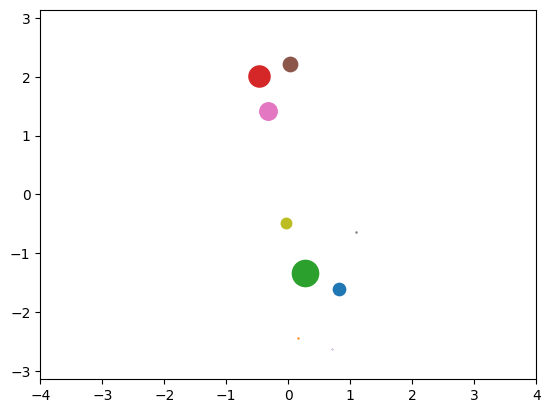

In [27]:
pseudojets = [fj.PseudoJet(px, py, pz, e) for eta, phi, pt, e, px, py, pz in all_event_s[50]]
R=0.5
jet_def=fj.JetDefinition(fj.cambridge_algorithm, R)
cluster_sequence = fj.ClusterSequence(pseudojets, jet_def)
jets_f = cluster_sequence.inclusive_jets()
#print("Number of jet=",len(jets))
for jet in jets_f:
    ph=jet.phi()
    if ph>np.pi:
        ph=ph-2*np.pi
    if ph<-np.pi:
        ph=ph+2*np.pi
    print(f"Jet: pt = {jet.pt()}, eta = {jet.eta()}, phi = {ph}, e = {jet.e()}")
    plt.scatter(jet.eta(),ph,s=jet.e())
plt.xlim(-4,4)
plt.ylim(-np.pi,np.pi)

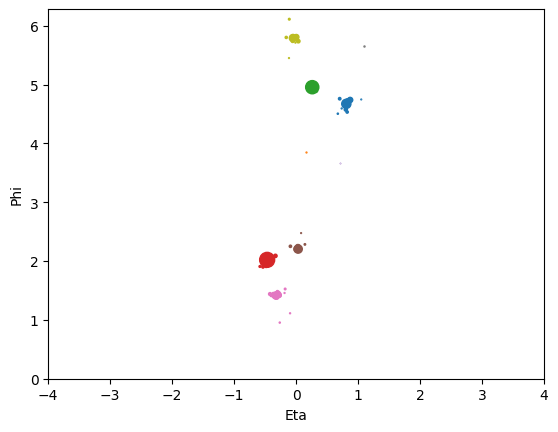

In [28]:

for jet in jets_f:
    constituents = jet.constituents()
    eta_values = [p.eta() for p in constituents]
    phi_values = [p.phi() for p in constituents]
    #phi_values = [p.phi()-2*np.pi if p.phi()> np.pi[1] p.phi()+2*np.pi if p.phi()<-np.pi[2] else"" for p in constituents]
    energy_values = [p.e() for p in constituents]
    plt.scatter(eta_values, phi_values,s=energy_values, alpha=1, label=f'Jet with pT={jet.pt():.2f}')
plt.xlabel('Eta')
plt.ylabel('Phi')
plt.xlim(-4,4)
plt.ylim(0,2*np.pi)
plt.show()

Text(0, 0.5, '$\\phi$')

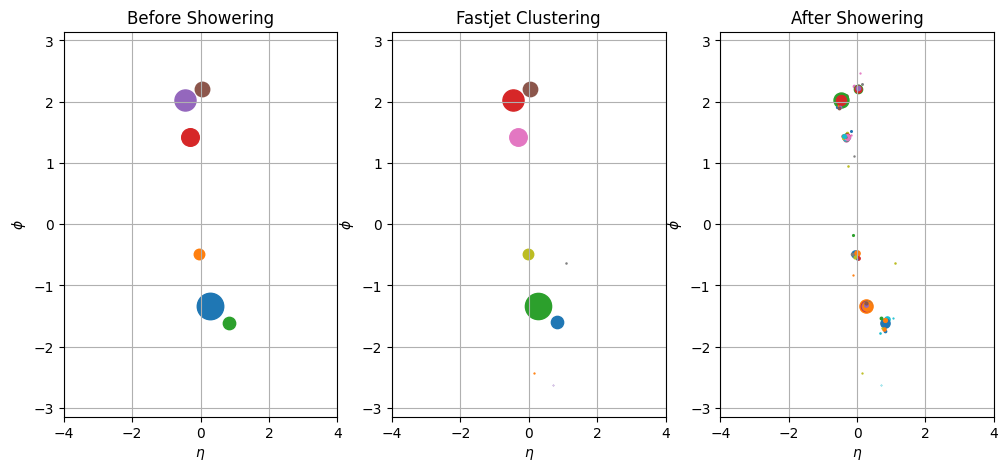

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))
for i in all_event[50]:
    axes[0].scatter(i[0],i[1],s=i[3])
axes[0].set_ylim(-np.pi,np.pi)
axes[0].set_xlim(-4,4)
axes[0].grid(True)
axes[0].set_title('Before Showering')
axes[0].set_xlabel(r'$\eta$')
axes[0].set_ylabel(r'$\phi$')
for jet in jets_f:
    ph=jet.phi()
    if ph>np.pi:
        ph=ph-2*np.pi
    if ph<-np.pi:
        ph=ph+2*np.pi
    #print(f"Jet: pt = {jet.pt()}, eta = {jet.eta()}, phi = {ph}, e = {jet.e()}")
    axes[1].scatter(jet.eta(),ph,s=jet.e())
axes[1].set_ylim(-np.pi,np.pi)
axes[1].set_xlim(-4,4)
axes[1].grid(True)
axes[1].set_title('Fastjet Clustering')
axes[1].set_xlabel(r'$\eta$')
axes[1].set_ylabel(r'$\phi$')
for j in all_event_s[50]:
    axes[2].scatter(j[0],j[1],s=j[3])
axes[2].set_ylim(-np.pi,np.pi)
axes[2].set_xlim(-4,4)
axes[2].grid(True)
axes[2].set_title('After Showering')
axes[2].set_xlabel(r'$\eta$')
axes[2].set_ylabel(r'$\phi$')

In [30]:
# Define the delta_r function
def delta_r(p1, p2):
    delta_eta = p1[0] - p2[0]
    delta_phi = np.abs(p1[1] - p2[1])
    if delta_phi > np.pi:
        delta_phi = 2 * np.pi - delta_phi
    return np.sqrt(delta_eta**2 + delta_phi**2)

# Function to merge particles
def merge_particles(data, imin, jmin):
    # Add p4 values
    px_sum = data[imin, 4] + data[jmin, 4]
    py_sum = data[imin, 5] + data[jmin, 5]
    pz_sum = data[imin, 6] + data[jmin, 6]
    E_sum = data[imin, 3] + data[jmin, 3]

    # Calculate eta, phi, pt from new px, py, pz
    pt_sum = np.sqrt(px_sum**2 + py_sum**2)
    magn_p = np.sqrt(px_sum**2 + py_sum**2 + pz_sum**2)
    eta_sum = 0.5 * np.log((magn_p + pz_sum) / (magn_p - pz_sum))
    phi_sum = np.arctan2(py_sum, px_sum)
    if phi_sum > np.pi:
        phi_sum = - 2*np.pi + phi_sum
    elif phi_sum < -np.pi:
        phi_sum = 2*np.pi + phi_sum

    # Update the data array with new values
    data = np.vstack([data, [eta_sum, phi_sum, pt_sum, E_sum, px_sum, py_sum, pz_sum]])
    return data

def update_dis(new_row, dist_matrix):
    size = dist_matrix.shape[0] + 1
    new_dist_matrix = np.zeros((size, size))
    new_dist_matrix[:-1, :-1] = dist_matrix
    new_dist_matrix[-1,:] = new_row
    new_dist_matrix[:-1,-1] = new_row[:-1]
    new_dist_matrix[-1,-1] = np.inf
    if np.min(new_dist_matrix) < 1e-2:
        indices = np.unravel_index(np.argmin(new_dist_matrix), new_dist_matrix.shape)
        new_dist_matrix[indices[0],indices[1]] = np.inf
    return new_dist_matrix

def find_daughters(binary_tree, index, given_index):
    daughters = []

    # Base case: if index is not in the tree, return empty list
    if index not in binary_tree:
        return daughters

    # Recursive case
    node = binary_tree[index]
    if 'left' in node:
        left_index = node['left']
        if left_index < given_index:
            daughters.append(left_index)
        daughters.extend(find_daughters(binary_tree, left_index, given_index))
    if 'right' in node:
        right_index = node['right']
        if right_index < given_index:
            daughters.append(right_index)
        daughters.extend(find_daughters(binary_tree, right_index, given_index))

    return daughters






def Custom_CA(R:float, data:np.array):
    start_time = time.time()
    dendogram = []
    merge_count = 0
    jets, mergers, jets_constituents = [],[],[]
    n_particles = data.shape[0]
    distances = np.full((n_particles, n_particles), np.inf)
    
    # Calculate the distance matrix and beam distances
    for i in range(n_particles):
        for j in range(i + 1, n_particles):
            distances[i, j] = delta_r(data[i], data[j])
            distances[j, i] = distances[i, j]
    dist_matrix = np.copy(distances)
    
    np.set_printoptions(linewidth=np.inf)
    
    while(1):
        indices = np.unravel_index(np.argmin(dist_matrix, axis=None), dist_matrix.shape)
        min_dist = dist_matrix[indices[0], indices[1]]
        if min_dist < R:
            data = merge_particles(data, indices[0], indices[1])
            dendogram.append([merge_count+n_particles,indices[0],indices[1],min_dist])
            merge_count+=1
            append_R = [delta_r(data[j], data[-1]) for j in range(data.shape[0])]
            dist_matrix = update_dis(append_R, dist_matrix)
            dist_matrix[indices[0],:], dist_matrix[indices[1],:] = np.inf, np.inf
            dist_matrix[:,indices[0]], dist_matrix[:,indices[1]] = np.inf, np.inf
            for i,j,k,_ in dendogram:
                dist_matrix[j,:], dist_matrix[k,:] = np.inf, np.inf
                dist_matrix[:,j], dist_matrix[:,k] = np.inf, np.inf
        
        elif min_dist >= R and min_dist < np.inf:
            if (indices[0] not in mergers) and (indices[1] not in mergers):
                jets.append(data[indices[0]])
                jets.append(data[indices[1]])
                mergers.append(indices[0])
                mergers.append(indices[1])
                for merge in mergers:
                    dist_matrix[merge,indices[0]], dist_matrix[indices[0],merge] = np.inf, np.inf
                    dist_matrix[merge,indices[1]], dist_matrix[indices[1],merge] = np.inf, np.inf
            if (indices[0] in mergers) and (indices[1] not in mergers):
                jets.append(data[indices[1]])
                mergers.append(indices[1])
                for merge in mergers:
                    dist_matrix[merge,indices[1]], dist_matrix[indices[1],merge] = np.inf, np.inf
            if (indices[0] not in mergers) and (indices[1] in mergers):
                jets.append(data[indices[0]])
                mergers.append(indices[0])
                for merge in mergers:
                    dist_matrix[merge,indices[0]], dist_matrix[indices[0],merge] = np.inf, np.inf
                
        elif min_dist == np.inf:
            # mergers.append(data.shape[0]-1)
            print(f"Loop Broken in {round(time.time()-start_time,4)}s")
            break

    t = time.time()
    tree = {} 
    dendogram = np.array(dendogram)
    for entry in dendogram:
        merged_index, index1, index2,_ = entry
        if merged_index not in tree:
            tree[merged_index] = {'left': index1, 'right': index2}
        else:
            print(f"Node {merged_index} is already defined in the tree.")
    
    for merge in mergers:
        children = []
        children = find_daughters(tree, merge, n_particles)
        jet_constituents = []
        for child in children:
            jet_constituents.append(all_event_s[int(child)])
        jets_constituents.append(jet_constituents)
    print(f"Time taken for finding consitutents {round(time.time()-t,6)}s")
        
    return jets, jets_constituents, tree, mergers

In [35]:
jets, jets_constituents, tree, mergers = Custom_CA(0.5, np.array(all_event_s[50]))
len(jets)

Loop Broken in 0.0844s
Time taken for finding consitutents 0.000456s


9

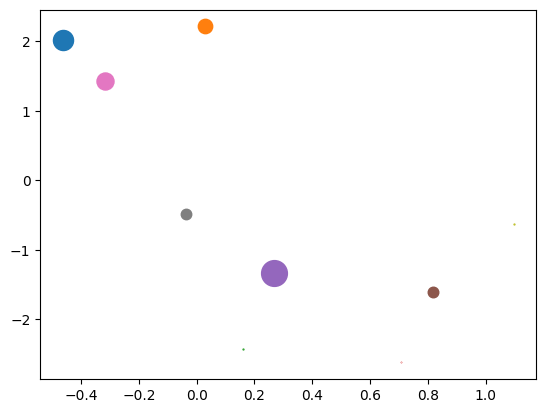

In [36]:
for i in jets:
    plt.scatter(i[0],i[1],s=i[2])

Text(0, 0.5, '$\\phi$')

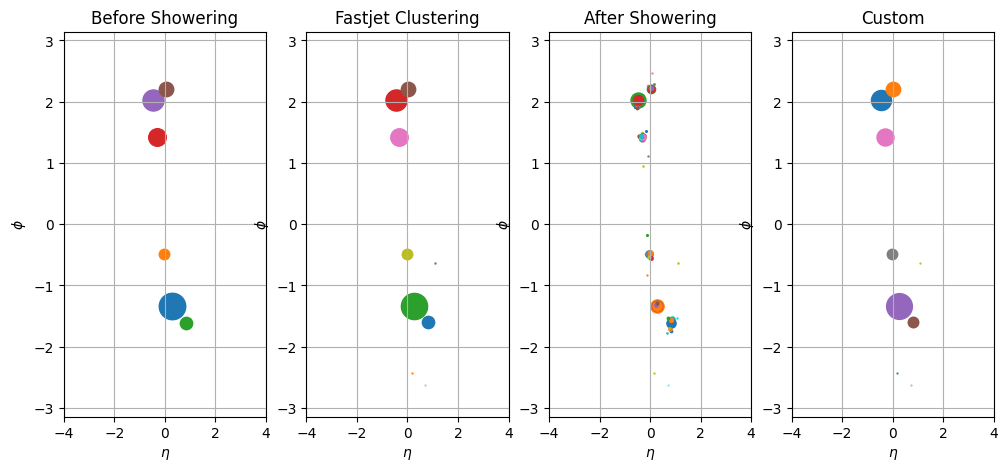

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(12,5))
for i in all_event[50]:
    axes[0].scatter(i[0],i[1],s=i[3])
axes[0].set_ylim(-np.pi,np.pi)
axes[0].set_xlim(-4,4)
axes[0].grid(True)
axes[0].set_title('Before Showering')
axes[0].set_xlabel(r'$\eta$')
axes[0].set_ylabel(r'$\phi$')
for jm in jets_f:
    pih=jm.phi()
    if pih>np.pi:
        pih=pih-2*np.pi
    if pih<-np.pi:
        pih=pih+2*np.pi
    #print(f"Jet: pt = {jet.pt()}, eta = {jet.eta()}, phi = {ph}, e = {jet.e()}")
    axes[1].scatter(jm.eta(),pih,s=jm.e())
axes[1].set_ylim(-np.pi,np.pi)
axes[1].set_xlim(-4,4)
axes[1].grid(True)
axes[1].set_title('Fastjet Clustering')
axes[1].set_xlabel(r'$\eta$')
axes[1].set_ylabel(r'$\phi$')
for j in all_event_s[50]:
    axes[2].scatter(j[0],j[1],s=j[3])
axes[2].set_ylim(-np.pi,np.pi)
axes[2].set_xlim(-4,4)
axes[2].grid(True)
axes[2].set_title('After Showering')
axes[2].set_xlabel(r'$\eta$')
axes[2].set_ylabel(r'$\phi$')
for i in jets:
    axes[3].scatter(i[0],i[1],s=i[2])
axes[3].set_ylim(-np.pi,np.pi)
axes[3].set_xlim(-4,4)
axes[3].grid(True)
axes[3].set_title('Custom')
axes[3].set_xlabel(r'$\eta$')
axes[3].set_ylabel(r'$\phi$')